# **DIABETES DATASET: HYPOTHESIS TESTING**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

<span style="font-size: 16px;">In this book, we run hypothesis tests regarding several potentially important causalities in the dataset variables.

In [7]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [10]:
# Load the dataset
data = pd.read_csv('diabetes_ONLY_binary.csv')

### **Test 1: Difference in Diabetes/Prediabetes Prevalence between Male and Female samples**

H0: There is no significant difference between the diabetes prevalence in males and females.

H1: There is a significant difference between the diabetes prevalence in males and females.

In [20]:
# Calculate the number of diabetes cases for females and males
diabetes_females = females['Diabetes_prevalence'].sum()
diabetes_males = males['Diabetes_prevalence'].sum()

# Get the total number of females and males
total_females = females.shape[0]
total_males = males.shape[0]

# Calculate the prevalence (share) for females and males and convert to percentage
prevalence_females = (diabetes_females / total_females) * 100
prevalence_males = (diabetes_males / total_males) * 100

# Print the results rounded to 1 decimal place
print(f"Prevalence of diabetes in females: {prevalence_females:.1f}%")
print(f"Prevalence of diabetes in males: {prevalence_males:.1f}%")

Prevalence of diabetes in females: 48.0%
Prevalence of diabetes in males: 52.4%


In [21]:
# Group data by 'Sex' and calculate the count of diabetes cases
females = data[data['Sex'] == 0]
males = data[data['Sex'] == 1]

# Get the number of diabetes cases for females and males
diabetes_females = females['Diabetes_prevalence'].sum()
diabetes_males = males['Diabetes_prevalence'].sum()

# Get the total number of females and males
total_females = females.shape[0]
total_males = males.shape[0]

In [22]:
# Define successes (diabetes cases) and total observations
successes = np.array([diabetes_females, diabetes_males])
totals = np.array([total_females, total_males])

# Perform the two-proportion z-test
stat, p_value = proportions_ztest(successes, totals)

In [23]:
# Set the significance level (commonly 0.05)
alpha = 0.05

# Print the p-value and test statistic
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between males and females.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between males and females.")

Z-statistic: -11.808476217767147
P-value: 3.5289890543893405e-32
Reject the null hypothesis - There is a significant difference between males and females.


Given the very small p-value (much smaller than the 0.05 significance threshold), we reject the null hypothesis. This means there is statistically significant evidence to suggest that the prevalence of diabetes differs between males and females. This result implies that gender (male or female) is associated with differing diabetes prevalence rates. Therefore, males and females do not share the same rate of diabetes prevalence in the population sampled. In practical terms, health interventions or policies aimed at diabetes prevention and treatment may need to take gender differences into account, as diabetes risk factors and prevalence are not uniformly distributed across genders.

### **Test 2: Does the BMI Level Differ for Diabetes Patients and Non-diabetics?** 

H0: There is no significant difference in diabetes prevalence between individuals with high BMI and those without high BMI.

H1: There is a significant difference in diabetes prevalence between individuals with high BMI and those without high BMI.

In [12]:
# Group data by 'HighBMI' and calculate the count of diabetes cases
high_bmi = data[data['HighBMI'] == 1]
normal_bmi = data[data['HighBMI'] == 0]

# Get the number of diabetes cases for high BMI and normal BMI
diabetes_high_bmi = high_bmi['Diabetes_prevalence'].sum()
diabetes_normal_bmi = normal_bmi['Diabetes_prevalence'].sum()

# Get the total number of individuals with high BMI and normal BMI
total_high_bmi = high_bmi.shape[0]
total_normal_bmi = normal_bmi.shape[0]

In [13]:
# Define successes (diabetes cases) and total observations
successes = np.array([diabetes_high_bmi, diabetes_normal_bmi])
totals = np.array([total_high_bmi, total_normal_bmi])

# Perform the two-proportion z-test
stat, p_value = proportions_ztest(successes, totals)

In [19]:
# Set the significance level (commonly 0.05)
alpha = 0.05

# Print the p-value and test statistic
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference in diabetes prevalence based on BMI levels.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference in diabetes prevalence based on BMI levels.")

Z-statistic: 63.47427653208621
P-value: 0.0
Reject the null hypothesis - There is a significant difference in diabetes prevalence based on BMI levels.


The analysis provides compelling evidence that individuals with high BMI have a significantly different prevalence of diabetes compared to those with normal BMI. With a z-statistic of 63.47 and a p-value of 0.0, we can confidently conclude that BMI levels are strongly associated with diabetes prevalence, emphasizing the need for targeted health interventions for individuals with higher BMI.

In [15]:
# Calculate the number of diabetes cases for high BMI and normal BMI
diabetes_high_bmi = high_bmi['Diabetes_prevalence'].sum()
diabetes_normal_bmi = normal_bmi['Diabetes_prevalence'].sum()

# Get the total number of individuals with high BMI and normal BMI
total_high_bmi = high_bmi.shape[0]
total_normal_bmi = normal_bmi.shape[0]

# Calculate the prevalence (share) for high BMI and normal BMI and convert to percentage
prevalence_high_bmi = (diabetes_high_bmi / total_high_bmi) * 100
prevalence_normal_bmi = (diabetes_normal_bmi / total_normal_bmi) * 100

# Print the results rounded to 1 decimal place
print(f"Diabetes prevalence in individuals with high BMI: {prevalence_high_bmi:.1f}%")
print(f"Diabetes prevalence in individuals with normal BMI: {prevalence_normal_bmi:.1f}%")

Diabetes prevalence in individuals with high BMI: 56.2%
Diabetes prevalence in individuals with normal BMI: 27.1%


In [25]:
# Example data (your actual z-statistics and p-values)
data = {
    'Variable': ['CollegeEducation', 'PoorGenHlth', 'PoorPhysHlth', 'LowIncome', 'HighAge', 'HighBMI', 'HighBP', 'HighChol', 'DiffWalk', 'PhysActivity', 'HeartDiseaseorAttack', 'Stroke', 'CholCheck', 'HSchoolEducation', 'HvyAlcoholConsump', 'Smoker', 'Veggies', 'Fruits', 'Sex', 'NoDocbcCost', 'PoorMentHlth', 'AnyHealthcare'],
    'Z-statistic': [-40.71, 45.86, 48.81, 48.68, 62.61, 63.47, 101.44, 76.90, 72.49, -42.19, 56.24, 33.35, 30.68, -27.20, -25.22, 22.87, -21.08, -14.38, 11.81, 10.89, 10.36, 6.17],
    'P-value': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.68e-244, 1.13e-206, 5.80e-163, 2.45e-140, 1.03e-115, 1.15e-98, 7.13e-47, 3.53e-32, 1.22e-27, 3.65e-25, 7.01e-10]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define significance level (you can adjust this based on your use case)
alpha = 0.05

# Function to interpret the z-statistic and p-value
def interpret_result(row):
    if row['P-value'] < alpha:
        significance = "Statistically significant"
    else:
        significance = "Not statistically significant"
    
    # Strong association is considered when the absolute z-statistic is large
    if abs(row['Z-statistic']) > 30:
        strength = "Very strong association"
    elif abs(row['Z-statistic']) > 10:
        strength = "Moderate to strong association"
    else:
        strength = "Weak to moderate association"
    
    return f"{significance}, {strength}"

# Apply interpretation to each row
df['Interpretation'] = df.apply(interpret_result, axis=1)

# Sort the DataFrame by the original index (in this case the order of variables)
df_sorted_by_index = df.reset_index().sort_values(by='index')

# Print the updated DataFrame
print(df_sorted_by_index[['Variable', 'Z-statistic', 'P-value', 'Interpretation']])

                Variable  Z-statistic        P-value  \
0       CollegeEducation       -40.71   0.000000e+00   
1            PoorGenHlth        45.86   0.000000e+00   
2           PoorPhysHlth        48.81   0.000000e+00   
3              LowIncome        48.68   0.000000e+00   
4                HighAge        62.61   0.000000e+00   
5                HighBMI        63.47   0.000000e+00   
6                 HighBP       101.44   0.000000e+00   
7               HighChol        76.90   0.000000e+00   
8               DiffWalk        72.49   0.000000e+00   
9           PhysActivity       -42.19   0.000000e+00   
10  HeartDiseaseorAttack        56.24   0.000000e+00   
11                Stroke        33.35  7.680000e-244   
12             CholCheck        30.68  1.130000e-206   
13      HSchoolEducation       -27.20  5.800000e-163   
14     HvyAlcoholConsump       -25.22  2.450000e-140   
15                Smoker        22.87  1.030000e-115   
16               Veggies       -21.08   1.150000

In [26]:
'# Replace this with your actual data loading process
df = pd.read_csv('diabetes_ONLY_binary.csv')

# Binary variables (you can adjust this based on your dataset)
binary_variables = ['Sex', 'PoorGenHlth', 'PoorPhysHlth', 'PoorMentHlth', 'AnyHealthcare', 
                    'HighBMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                    'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 'Fruits', 'Veggies',
                    'HvyAlcoholConsump', 'HighAge', 'LowIncome', 'NoDocbcCost', 
                    'HSchoolEducation', 'CollegeEducation']

# Function to calculate diabetes prevalence for yes/no groups
def calculate_prevalence(var):
    prevalence_table = df.groupby(var)['Diabetes_prevalence'].mean() * 100
    return prevalence_table

# Create an empty dictionary to store results
prevalence_results = {}

# Loop over each binary variable and calculate the prevalence for yes/no groups
for var in binary_variables:
    prevalence_results[var] = calculate_prevalence(var)

# Convert the results dictionary into a DataFrame for easier viewing
prevalence_df = pd.DataFrame(prevalence_results).T  # Transpose to align variables as rows
prevalence_df.columns = ['No (0) Diabetes Prevalence (%)', 'Yes (1) Diabetes Prevalence (%)']

# Print the prevalence table
print(prevalence_df)

                      No (0) Diabetes Prevalence (%)  \
Sex                                        47.962799   
PoorGenHlth                                47.420011   
PoorPhysHlth                               41.939121   
PoorMentHlth                               48.663991   
AnyHealthcare                              44.660804   
HighBMI                                    27.109111   
HighBP                                     28.327933   
HighChol                                   34.775866   
CholCheck                                  13.779302   
Smoker                                     45.907694   
Stroke                                     48.385296   
HeartDiseaseorAttack                       45.595339   
PhysActivity                               62.206450   
DiffWalk                                   42.072086   
Fruits                                     53.394308   
Veggies                                    57.661398   
HvyAlcoholConsump                          51.00

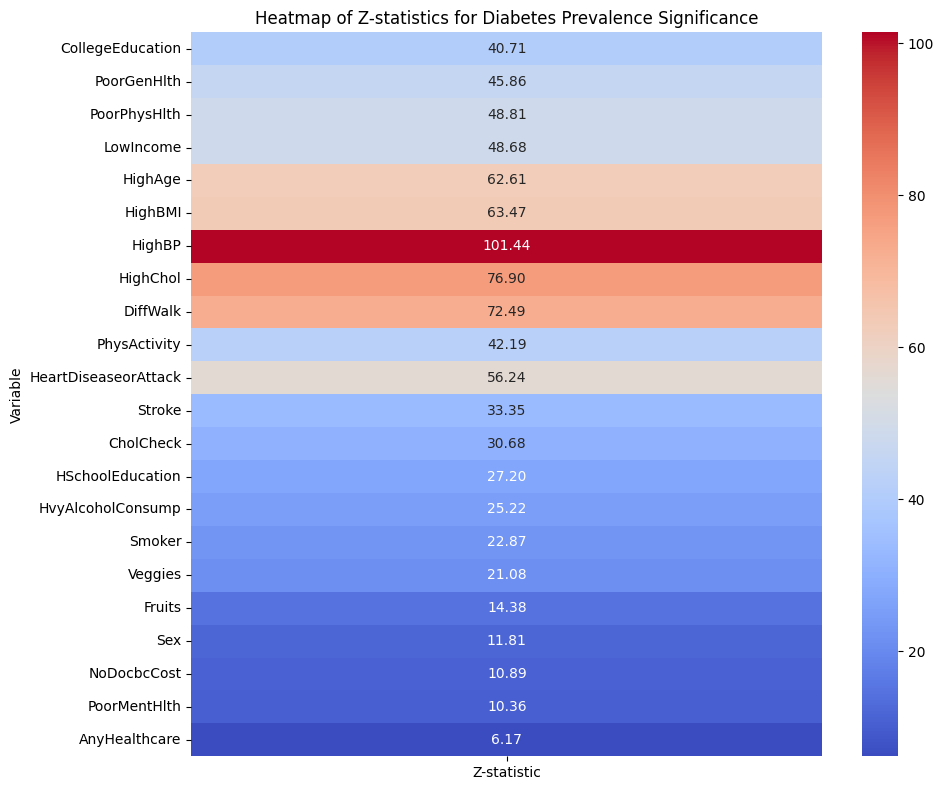

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data with Z-statistics and P-values for each variable (replace this with your actual values)
data = {
    'Variable': ['CollegeEducation', 'PoorGenHlth', 'PoorPhysHlth', 'LowIncome', 'HighAge', 
                 'HighBMI', 'HighBP', 'HighChol', 'DiffWalk', 'PhysActivity', 'HeartDiseaseorAttack',
                 'Stroke', 'CholCheck', 'HSchoolEducation', 'HvyAlcoholConsump', 'Smoker', 'Veggies', 
                 'Fruits', 'Sex', 'NoDocbcCost', 'PoorMentHlth', 'AnyHealthcare'],
    'Z-statistic': [-40.71, 45.86, 48.81, 48.68, 62.61, 63.47, 101.44, 76.90, 72.49, -42.19, 56.24, 
                    33.35, 30.68, -27.20, -25.22, 22.87, -21.08, -14.38, 11.81, 10.89, 10.36, 6.17],
    'P-value': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                7.68e-244, 1.13e-206, 5.80e-163, 2.45e-140, 1.03e-115, 1.15e-98, 
                7.13e-47, 3.53e-32, 1.22e-27, 3.65e-25, 7.01e-10]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using Z-statistics (absolute values)
sns.heatmap(df[['Z-statistic']].set_index(df['Variable']).abs(), cmap="coolwarm", annot=True, fmt='.2f')

# Add titles and labels
plt.title('Heatmap of Z-statistics for Diabetes Prevalence Significance')
plt.ylabel('Variable')

# Show the plot
plt.tight_layout()
plt.show()

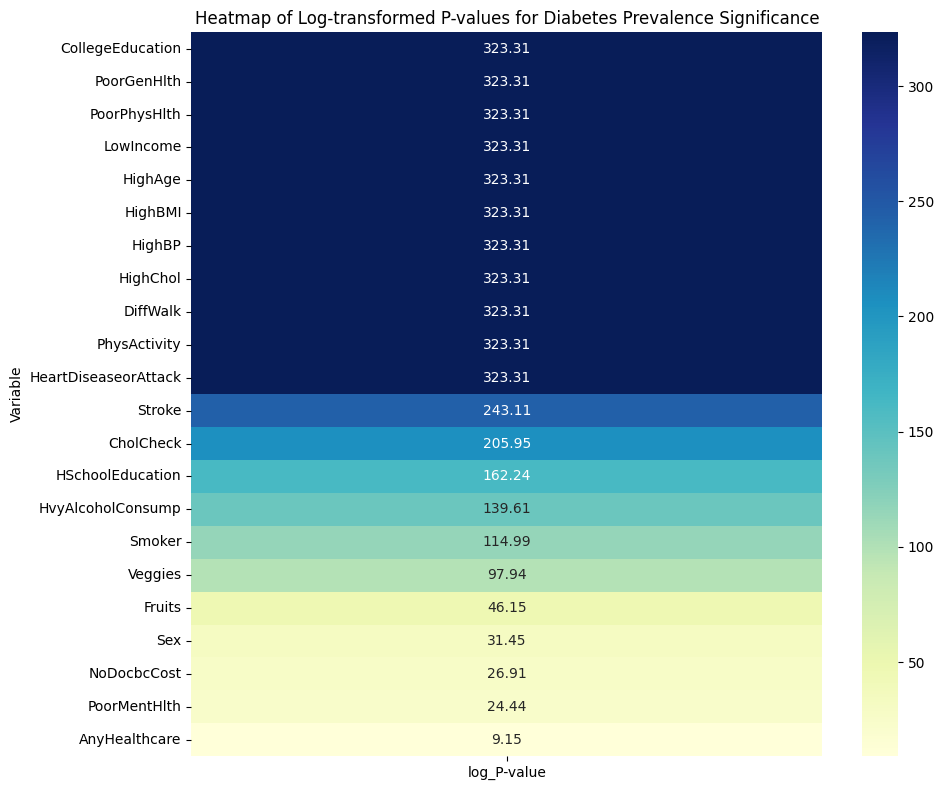

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data with Z-statistics and P-values for each variable (same data as before)
data = {
    'Variable': ['CollegeEducation', 'PoorGenHlth', 'PoorPhysHlth', 'LowIncome', 'HighAge', 
                 'HighBMI', 'HighBP', 'HighChol', 'DiffWalk', 'PhysActivity', 'HeartDiseaseorAttack',
                 'Stroke', 'CholCheck', 'HSchoolEducation', 'HvyAlcoholConsump', 'Smoker', 'Veggies', 
                 'Fruits', 'Sex', 'NoDocbcCost', 'PoorMentHlth', 'AnyHealthcare'],
    'Z-statistic': [-40.71, 45.86, 48.81, 48.68, 62.61, 63.47, 101.44, 76.90, 72.49, -42.19, 56.24, 
                    33.35, 30.68, -27.20, -25.22, 22.87, -21.08, -14.38, 11.81, 10.89, 10.36, 6.17],
    'P-value': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                7.68e-244, 1.13e-206, 5.80e-163, 2.45e-140, 1.03e-115, 1.15e-98, 
                7.13e-47, 3.53e-32, 1.22e-27, 3.65e-25, 7.01e-10]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Transform p-values using -log10 to make them more readable (smaller p-values = more significant)
df['log_P-value'] = -np.log10(df['P-value'].replace(0, np.nextafter(0, 1)))  # Replace 0 with a tiny number for log

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using log-transformed p-values
sns.heatmap(df[['log_P-value']].set_index(df['Variable']), cmap="YlGnBu", annot=True, fmt='.2f')

# Add titles and labels
plt.title('Heatmap of Log-transformed P-values for Diabetes Prevalence Significance')
plt.ylabel('Variable')

# Show the plot
plt.tight_layout()
plt.show()

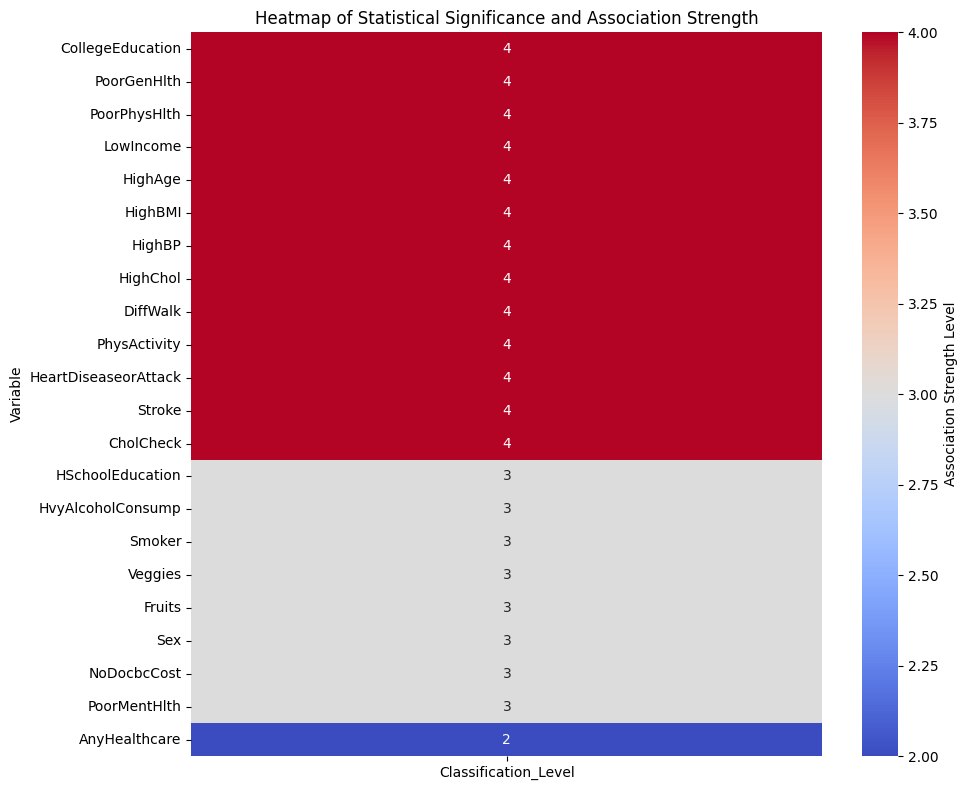

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Classification data based on your description
data = {
    'Variable': ['CollegeEducation', 'PoorGenHlth', 'PoorPhysHlth', 'LowIncome', 'HighAge', 
                 'HighBMI', 'HighBP', 'HighChol', 'DiffWalk', 'PhysActivity', 'HeartDiseaseorAttack',
                 'Stroke', 'CholCheck', 'HSchoolEducation', 'HvyAlcoholConsump', 'Smoker', 'Veggies', 
                 'Fruits', 'Sex', 'NoDocbcCost', 'PoorMentHlth', 'AnyHealthcare'],
    'Classification': ['Very strong association', 'Very strong association', 'Very strong association', 
                       'Very strong association', 'Very strong association', 'Very strong association', 
                       'Very strong association', 'Very strong association', 'Very strong association', 
                       'Very strong association', 'Very strong association', 'Very strong association', 
                       'Very strong association', 'Moderate to strong association', 
                       'Moderate to strong association', 'Moderate to strong association', 
                       'Moderate to strong association', 'Moderate to strong association', 
                       'Moderate to strong association', 'Moderate to strong association', 
                       'Moderate to strong association', 'Weak to moderate association']
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Create a mapping for classifications to numerical values for visualization
classification_mapping = {
    'Very strong association': 4,
    'Moderate to strong association': 3,
    'Weak to moderate association': 2
}

# Map the classification to numerical values
df['Classification_Level'] = df['Classification'].map(classification_mapping)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df[['Classification_Level']].set_index(df['Variable']), cmap="coolwarm", annot=True, fmt='d', cbar_kws={'label': 'Association Strength Level'})

# Customize the plot
plt.title('Heatmap of Statistical Significance and Association Strength')
plt.ylabel('Variable')

# Show the plot
plt.tight_layout()
plt.show()